In [1]:
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import shap 
import numpy as np
from sklearn.calibration import CalibratedClassifierCV

# Import datasets

In [2]:
csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL31", "TSR_ALL31G_X_TRAIN.csv")
G_X_train = pd.read_csv(csv_path)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL31", "TSR_ALL31G_y_TRAIN.csv")
G_y_train = pd.read_csv(csv_path)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL31", "TSR_ALL31B_X_TRAIN.csv")
B_X_train = pd.read_csv(csv_path)

csv_path = os.path.join("..", "..", "data", "LINKED_DATA", "TSR_ALL", "TSR_ALL31", "TSR_ALL31B_y_TRAIN.csv")
B_y_train = pd.read_csv(csv_path)

# ET_G

# XGBC_G

In [3]:
pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE4", "TSR_ALL31G_XGBC_TUNED.pkl")
G_XGBC_TUNED = joblib.load(pkl_path)

pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE4", "TSR_ALL31G_XGBC_CALIBRATED.pkl")
G_XGBC_CALIBRATED = joblib.load(pkl_path)

In [4]:
xgbcG_fi = G_XGBC_CALIBRATED.base_estimator._final_estimator.feature_importances_
xgbcG_fi_df = pd.DataFrame(xgbcG_fi)
xgbcG_fi_df.index = G_X_train.columns
xgbcG_fi_df.columns = (["Value"])
xgbcG_fi_plot = xgbcG_fi_df.reset_index(drop=False)
xgbcG_fi_plot.columns = (["Feature", "Value"])
xgbcG_fi_plot = xgbcG_fi_plot.sort_values(["Value"], ascending=True)

In [5]:
xgbcG_fi_plot_noZERO = xgbcG_fi_plot[~xgbcG_fi_plot.Value.isin([0])]
xgbcG_fi_plot_noZERO_mean = xgbcG_fi_plot_noZERO.Value.mean()
xgbcG_fi_plot_noZERO_std = xgbcG_fi_plot_noZERO.Value.std()
sigma_n = len(xgbcG_fi_plot_noZERO[xgbcG_fi_plot_noZERO.Value > xgbcG_fi_plot_noZERO_mean + xgbcG_fi_plot_noZERO_std])
sigma_n

8

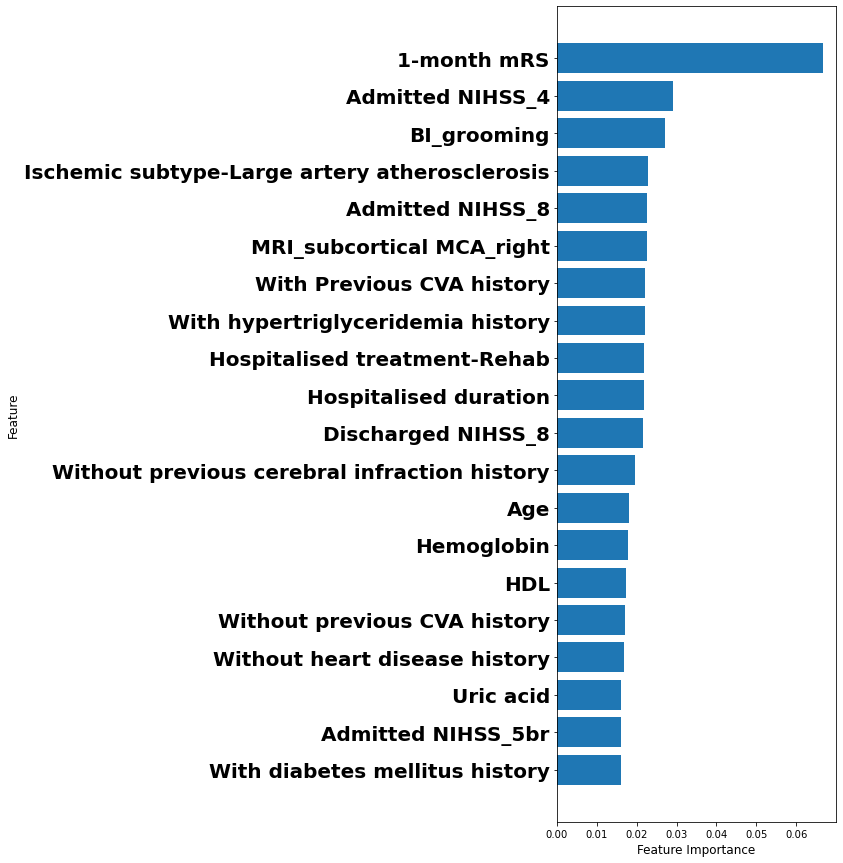

In [6]:
plt.figure(figsize=(5, 15))
plt.barh(xgbcG_fi_plot.tail(20).Feature, xgbcG_fi_plot.tail(20).Value)
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.yticks(fontsize=20)
plt.yticks(weight = 'bold')
plt.savefig('PLOT/TSR_ALL31/XGBC_G_F.png', dpi=300, bbox_inches="tight")
plt.show()

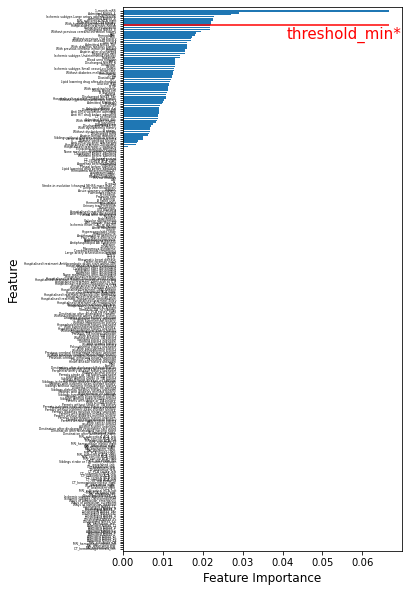

In [7]:
plt.figure(figsize=(5, 10))
plt.barh(xgbcG_fi_plot.Feature, xgbcG_fi_plot.Value)
plt.hlines(282.5,0,max(xgbcG_fi_plot.Value),color="red")
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.yticks(fontsize=3)
plt.ylim((-1,292))
plt.text(max(xgbcG_fi_plot.Value)-0.0255,275, "threshold_min*", fontsize=15, color="red")
plt.savefig('PLOT/TSR_ALL31/XGBC_G.png', dpi=300, bbox_inches="tight")
plt.show()

In [8]:
xgbcG_fi_plot_20 = xgbcG_fi_plot.sort_values(["Value"], ascending=False).Feature.head(20)
G_X_train_selected = G_X_train[xgbcG_fi_plot_20]

G_XGBC_TUNED_20 = G_XGBC_CALIBRATED.base_estimator.fit(G_X_train_selected, np.ravel(G_y_train))
cccv_selected = CalibratedClassifierCV(base_estimator=G_XGBC_TUNED_20, cv=5)
G_XGBC_CALIBRATED_20 = cccv_selected.fit(G_X_train_selected, np.ravel(G_y_train))

xgbcG_fi_s = G_XGBC_CALIBRATED_20.base_estimator._final_estimator.feature_importances_
xgbcG_fi_s_df = pd.DataFrame(xgbcG_fi_s)
xgbcG_fi_s_df.index = G_X_train_selected.columns
xgbcG_fi_s_df.columns = (["Value"])
xgbcG_fi_s_df = xgbcG_fi_s_df.sort_values(["Value"], ascending=False)

 97%|=================== | 11984/12377 [00:12<00:00]       

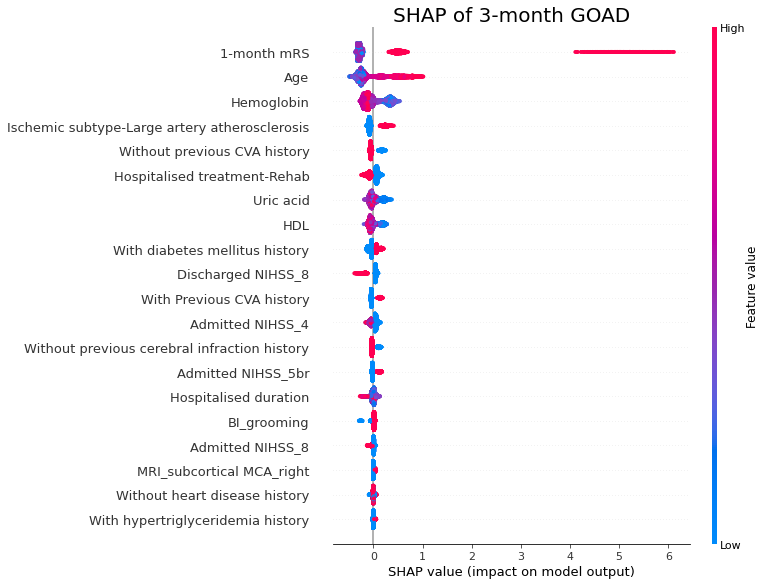

In [9]:
xgbcG31_shap_values = shap.TreeExplainer(G_XGBC_CALIBRATED_20.base_estimator._final_estimator, G_X_train_selected).shap_values(G_X_train_selected)
plt.title('SHAP of 3-month GOAD', fontsize=20)
shap.summary_plot(xgbcG31_shap_values, G_X_train_selected, max_display=30,show=False)
plt.savefig('PLOT/TSR_ALL31/SHAP_G31_XGBC.png', dpi=300, bbox_inches="tight")

# ET_B

# XGBC_B

In [10]:
pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE1", "TSR_ALL31B_XGBC_TUNED.pkl")
B_XGBC_TUNED = joblib.load(pkl_path)

pkl_path = os.path.join("..", "..", "model", "model_pickle", "MICE1", "TSR_ALL31B_XGBC_CALIBRATED.pkl")
B_XGBC_CALIBRATED = joblib.load(pkl_path)

In [11]:
xgbcB_fi = B_XGBC_CALIBRATED.base_estimator._final_estimator.feature_importances_
xgbcB_fi_df = pd.DataFrame(xgbcB_fi)
xgbcB_fi_df.index = B_X_train.columns
xgbcB_fi_df.columns = (["Value"])
xgbcB_fi_plot = xgbcB_fi_df.reset_index(drop=False)
xgbcB_fi_plot.columns = (["Feature", "Value"])
xgbcB_fi_plot = xgbcB_fi_plot.sort_values(["Value"], ascending=True)

In [12]:
xgbcB_fi_plot_noZERO = xgbcB_fi_plot[~xgbcB_fi_plot.Value.isin([0])]
xgbcB_fi_plot_noZERO_mean = xgbcB_fi_plot_noZERO.Value.mean()
xgbcB_fi_plot_noZERO_std = xgbcB_fi_plot_noZERO.Value.std()
sigma_n = len(xgbcB_fi_plot_noZERO[xgbcB_fi_plot_noZERO.Value > xgbcB_fi_plot_noZERO_mean + xgbcB_fi_plot_noZERO_std])
sigma_n

3

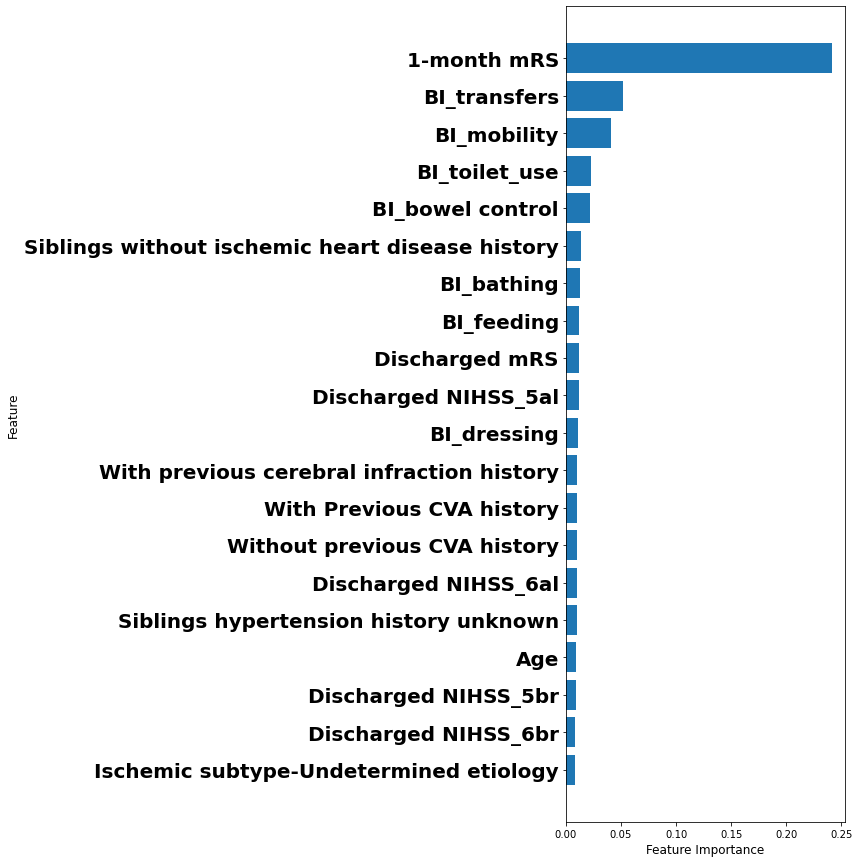

In [13]:
plt.figure(figsize=(5, 15))
plt.barh(xgbcB_fi_plot.tail(20).Feature, xgbcB_fi_plot.tail(20).Value)
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.yticks(fontsize=20)
plt.yticks(weight = 'bold')
plt.savefig('PLOT/TSR_ALL31/XGBC_B_F.png', dpi=300, bbox_inches="tight")
plt.show()

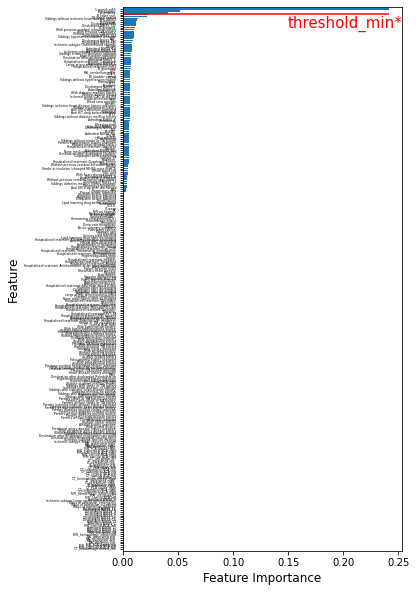

In [14]:
plt.figure(figsize=(5, 10))
plt.barh(xgbcB_fi_plot.Feature, xgbcB_fi_plot.Value)
plt.hlines(288.5,0,max(xgbcB_fi_plot.Value),color="red")
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.yticks(fontsize=3)
plt.ylim((-1,292))
plt.text(max(xgbcB_fi_plot.Value)-0.092,281, "threshold_min*", fontsize=15, color="red")
plt.savefig('PLOT/TSR_ALL31/XGBC_B.png', dpi=300, bbox_inches="tight")
plt.show()

In [15]:
xgbcB_fi_plot_20 = xgbcB_fi_plot.sort_values(["Value"], ascending=False).Feature.head(20)
B_X_train_selected = B_X_train[xgbcB_fi_plot_20]

B_XGBC_TUNED_20 = B_XGBC_CALIBRATED.base_estimator.fit(B_X_train_selected, np.ravel(B_y_train))
cccv_selected = CalibratedClassifierCV(base_estimator=B_XGBC_TUNED_20, cv=5)
B_XGBC_CALIBRATED_20 = cccv_selected.fit(B_X_train_selected, np.ravel(B_y_train))

xgbcB_fi_s = B_XGBC_CALIBRATED_20.base_estimator._final_estimator.feature_importances_
xgbcB_fi_s_df = pd.DataFrame(xgbcB_fi_s)
xgbcB_fi_s_df.index = B_X_train_selected.columns
xgbcB_fi_s_df.columns = (["Value"])
xgbcB_fi_s_df = xgbcB_fi_s_df.sort_values(["Value"], ascending=False)

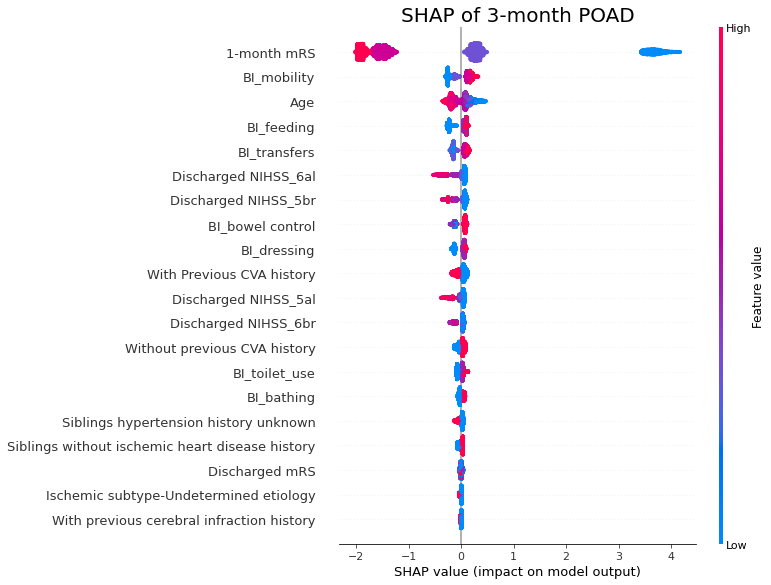

In [16]:
xgbcB31_shap_values = shap.TreeExplainer(B_XGBC_CALIBRATED_20.base_estimator._final_estimator, B_X_train_selected).shap_values(B_X_train_selected)
plt.title('SHAP of 3-month POAD', fontsize=20)
shap.summary_plot(xgbcB31_shap_values, B_X_train_selected, max_display=30,show=False)
plt.savefig('PLOT/TSR_ALL31/SHAP_B31_XGBC.png', dpi=300, bbox_inches="tight")